In [11]:
# Author: Julian
import pandas as pd
from pathlib import Path
from datetime import datetime
import seaborn as sns
from matplotlib.lines import lineStyles
from requests import session
from seaborn import kdeplot, palplot
import matplotlib.pyplot as plt

In [3]:
js_passed = pd.read_csv( "js_total_passed.csv")
js_passed["team"] = "js"
js_passed.drop(columns="id6 628 ", inplace=True, axis="columns")


j_handed = pd.read_csv( "j_handed_out.csv")
j_handed["person"] = "j"
s_handed = pd.read_csv( "s_handed_out.csv")
s_handed["person"] = "s"
js_handed = pd.concat([j_handed, s_handed], ignore_index=True)[["count", "date", "time", "person"]]
js_handed["team"] = "js"
js_handed.sort_values(by=["time"], inplace=True)



FileNotFoundError: [Errno 2] No such file or directory: 'js_total_passed.csv'

In [330]:
v_passed_second_half = pd.read_csv("v_passed_second_half.csv")
v_passed_second_half.drop(columns="id2 117 ", inplace=True, axis="columns")
v_handed_second_half = pd.read_csv("v_handed_out_second_half.csv")
v_handed_second_half.drop(columns="id1 31 ", inplace=True, axis="columns")
v_handed_second_half["team"] = "vw"
v_passed_second_half["team"] = "vw"
v_handed_second_half["person"] = "v"
v_passed_second_half["person"] = "v"

w_handed_second_half = pd.read_csv("w_handed_out_second_half.csv")
w_handed_second_half.drop(columns="id1 46 ", inplace=True, axis="columns")
w_passed_second_half = pd.read_csv("w_passed_second_half.csv")
w_passed_second_half.drop(columns="id2 194 ", inplace=True, axis="columns")
w_handed_second_half["team"] = "vw"
w_passed_second_half["team"] = "vw"
w_handed_second_half["person"] = "w"
w_passed_second_half["person"] = "w"

vw_passed_second_half = pd.concat([v_passed_second_half, v_handed_second_half, w_passed_second_half], ignore_index=True)
vw_passed_second_half.sort_values(by=["time"], inplace=True)

vw_handed_second_half = pd.concat([w_handed_second_half, v_handed_second_half], ignore_index=True)
vw_handed_second_half.sort_values(by=["time"], inplace=True)

vw_passed_first_half = pd.read_csv("vw_total_first_half_vetle.csv")
vw_passed_first_half["team"] = "vw"
vw_handed_first_half = vw_passed_first_half.loc[vw_passed_first_half["id"] == 2, :].copy()

vw_passed_first_half.drop(columns="id", inplace=True)
vw_handed_first_half.drop(columns="id", inplace=True)

vw_passed = pd.concat([vw_passed_first_half, vw_passed_second_half], ignore_index=True)
vw_handed = pd.concat([vw_handed_first_half, vw_handed_second_half], ignore_index=True)

v_passed_second_half = pd.concat([v_passed_second_half, v_handed_second_half], ignore_index=True)
v_passed_second_half.sort_values(by=["time"], inplace=True)
#v_handed_second_half

#w_passed_second_half
#w_handed_second_half


In [349]:

def add_time_from_start_15_35(df):
    df["timestamp"] = pd.to_datetime(df["date"] + " " + df["time"])
    
    # Define start time
    start_time = datetime.strptime("2024-11-01 15:35:00", "%Y-%m-%d %H:%M:%S")
    
    # Calculate seconds after start
    df["seconds_after_start"] = (df["timestamp"] - start_time).dt.total_seconds()
    
    return df

# Apply the function to each DataFrame
js_passed = add_time_from_start_15_35(js_passed)
vw_passed = add_time_from_start_15_35(vw_passed)
js_handed = add_time_from_start_15_35(js_handed)
vw_handed = add_time_from_start_15_35(vw_handed)
v_passed_second_half = add_time_from_start_15_35(v_passed_second_half)
v_handed_second_half = add_time_from_start_15_35(v_handed_second_half)
w_passed_second_half = add_time_from_start_15_35(w_passed_second_half)
w_handed_second_half = add_time_from_start_15_35(w_handed_second_half)
vw_handed_first_half = add_time_from_start_15_35(vw_handed_first_half)
vw_passed_first_half = add_time_from_start_15_35(vw_passed_first_half)


In [10]:
# session two started at 10:30
j_handed_2 = pd.read_csv("raw_data/2_j_handed.csv")
j_passed_2 = pd.read_csv("raw_data/2_j_passed.csv")
s_handed_2 = pd.read_csv("raw_data/2_s_handed.csv")
s_passed_2 = pd.read_csv("raw_data/2_s_passed.csv")
v_handed_2 = pd.read_csv("raw_data/2_v_handed.csv")
v_passed_2 = pd.read_csv("raw_data/2_v_passed.csv")
w_handed_2 = pd.read_csv("raw_data/2_w_handed.csv")
w_passed_2 = pd.read_csv("raw_data/2_w_passed.csv")


def add_time_from_start_10_30(df):
    df["timestamp"] = pd.to_datetime(df["date"] + " " + df["time"])
    
    # Define start time
    start_time = datetime.strptime("2024-11-08 10:30:00", "%Y-%m-%d %H:%M:%S")
    
    # Calculate seconds after start
    df["seconds_after_start"] = (df["timestamp"] - start_time).dt.total_seconds()
    
    return df

# Apply the function to each DataFrame for the second session
j_handed_2 = add_time_from_start_10_30(j_handed_2)
j_passed_2 = add_time_from_start_10_30(j_passed_2)
s_handed_2 = add_time_from_start_10_30(s_handed_2)
s_passed_2 = add_time_from_start_10_30(s_passed_2)
v_handed_2 = add_time_from_start_10_30(v_handed_2)
v_passed_2 = add_time_from_start_10_30(v_passed_2)
w_handed_2 = add_time_from_start_10_30(w_handed_2)
w_passed_2 = add_time_from_start_10_30(w_passed_2)

# Add team and person columns to each DataFrame for the second session
j_handed_2["team"] = "js"
j_handed_2["person"] = "j"
j_passed_2["team"] = "js"
j_passed_2["person"] = "j"

s_handed_2["team"] = "js"
s_handed_2["person"] = "s"
s_passed_2["team"] = "js"
s_passed_2["person"] = "s"

v_handed_2["team"] = "vw"
v_handed_2["person"] = "v"
v_passed_2["team"] = "vw"
v_passed_2["person"] = "v"

w_handed_2["team"] = "vw"
w_handed_2["person"] = "w"
w_passed_2["team"] = "vw"
w_passed_2["person"] = "w"

# Drop all columns with NaN values from each DataFrame
j_handed_2.dropna(axis=1, inplace=True)
j_passed_2.dropna(axis=1, inplace=True)
s_handed_2.dropna(axis=1, inplace=True)
s_passed_2.dropna(axis=1, inplace=True)
v_handed_2.dropna(axis=1, inplace=True)
v_passed_2.dropna(axis=1, inplace=True)
w_handed_2.dropna(axis=1, inplace=True)
w_passed_2.dropna(axis=1, inplace=True)

# Merge all handed DataFrames into their corresponding passed DataFrames
j_passed_2_double = pd.concat([j_passed_2, j_handed_2], ignore_index=True)
s_passed_2_double = pd.concat([s_passed_2, s_handed_2], ignore_index=True)
v_passed_2_double = pd.concat([v_passed_2, v_handed_2], ignore_index=True)
w_passed_2_double = pd.concat([w_passed_2, w_handed_2], ignore_index=True)

# Sort the merged DataFrames by time
j_passed_2_double.sort_values(by=["timestamp"], inplace=True)
s_passed_2_double.sort_values(by=["timestamp"], inplace=True)
v_passed_2_double.sort_values(by=["timestamp"], inplace=True)
w_passed_2_double.sort_values(by=["timestamp"], inplace=True)



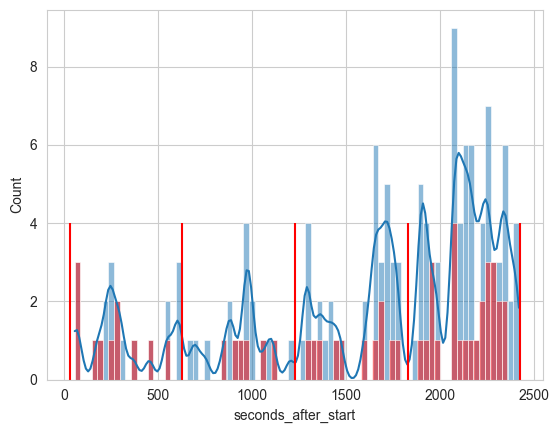

In [18]:
plt = sns.histplot(w_passed_2_double["seconds_after_start"], binwidth=30, kde=True, kde_kws={"bw_adjust": 0.1})
sns.histplot(w_handed_2["seconds_after_start"], binwidth=30, color="red", alpha=0.5)
plt.vlines(x = [30, 630, 1230, 1830, 2430], ymax=4, ymin=0, colors="r")

In [13]:
w_passed_2_double

,count,date,time,timestamp,seconds_after_start,team,person
90,1,2024-11-08,10:30:57.481,2024-11-08 10:30:57.481,57.481,vw,w
91,2,2024-11-08,10:30:57.648,2024-11-08 10:30:57.648,57.648,vw,w
92,3,2024-11-08,10:31:22.495,2024-11-08 10:31:22.495,82.495,vw,w
93,4,2024-11-08,10:32:56.288,2024-11-08 10:32:56.288,176.288,vw,w
94,5,2024-11-08,10:33:10.233,2024-11-08 10:33:10.233,190.233,vw,w
...,...,...,...,...,...,...,...
85,86,2024-11-08,11:09:46.683,2024-11-08 11:09:46.683,2386.683,vw,w
86,87,2024-11-08,11:09:58.742,2024-11-08 11:09:58.742,2398.742,vw,w
87,88,2024-11-08,11:09:59.127,2024-11-08 11:09:59.127,2399.127,vw,w
88,89,2024-11-08,11:10:11.052,2024-11-08 11:10:11.052,2411.052,vw,w


In [304]:
# give me a list of timestamps for each 30 second intervals that do not have any data

def get_missing_intervals(df, interval_length= 30):
    # Get the minimum and maximum
    min_time = df["seconds_after_start"].min()
    max_time = df["seconds_after_start"].max()
    
    # Create a list of all the intervals
    intervals = list(range(int(min_time), int(max_time), interval_length))
    
    # Get the intervals that do not contain any data in the DataFrame
    missing_intervals = [interval for interval in intervals if not ((df["seconds_after_start"] >= interval) & (df["seconds_after_start"] < interval + interval_length)).any()]
    
    
    # if intervales connected, keep last
    for i in range(1, len(missing_intervals)):
        if missing_intervals[i] - missing_intervals[i-1] == interval_length:
            missing_intervals[i-1] = None
            pass
    
    return missing_intervals

# Get the missing intervals for each DataFrame
js_passed_pauses_1 = get_missing_intervals(js_passed, 30)[:2]


In [305]:
def plot_session(df, start_times):
    plt = sns.histplot(df["seconds_after_start"], binwidth=30, kde=True, kde_kws={"bw_adjust": 0.1})
    plt.vlines(start_times, 0, 20, colors="red", linestyles="dashed", label="Session Start times", alpha=0.5)
    
    for interval in start_times:
        if interval is not None:
            plt.text(interval, 21, str(interval / 60), rotation=45, verticalalignment='bottom')

In [327]:
js_start_times = missing_intervals = [7] + get_missing_intervals(js_passed.loc[js_passed["seconds_after_start"] < 2100, :] , 30) + get_missing_intervals(js_passed.loc[js_passed["seconds_after_start"] > 1200, :] , 50) 
plot_session(js_passed, js_start_times)


KeyError: 'seconds_after_start'

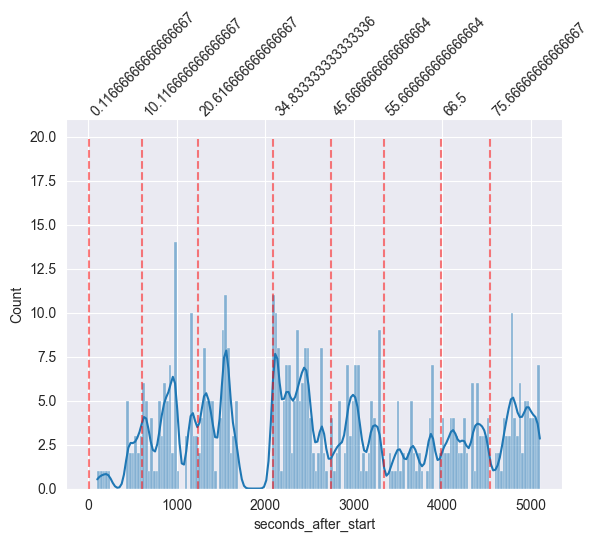

In [307]:
plot_session(vw_passed, js_start_times)

In [318]:

def parse_data_to_session(session_splits=5):
    start_times = [start_time for start_time in js_start_times if start_time is not None]
    mid_start_times = []
    for j in range(len(start_times)):
        mid_start_times.extend([start_times[j] + (600 / session_splits) * i for i in range(1, session_splits)])
    start_times = start_times + mid_start_times
    start_times.sort()
    df = pd.DataFrame({ "session_starts": start_times * 2})
    treatment_list = ([1] * session_splits + [0] * session_splits) * 4 + ([0] * session_splits + [1] * session_splits) * 4
    df["treatment"] = treatment_list
    df["team"] = ["js"] * 8 * session_splits + ["vw"] * 8 * session_splits
    # add handed out per session to the df by counting the number of entries in the handed out dataframes that are within the session
    df["handed_out"] = 0
    df["passed_by"] = 0
    df["session_within_session"] = 0
    for i in range(len(df)):
        start_time = df["session_starts"][i]
        end_time = df["session_starts"][i + 1] if i < len(df) - 1 and df["session_starts"][i + 1] > start_time else max(max(js_passed["seconds_after_start"]), max(vw_passed["seconds_after_start"]))
        if df.loc[i, "team"] == "js":
            handed_out = js_handed
            passed_by = js_passed
        else:
            handed_out = vw_handed
            passed_by = vw_passed
        df.loc[i, "handed_out"] = handed_out.loc[(handed_out["seconds_after_start"] >= start_time) & (handed_out["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "passed_by"] = passed_by.loc[(passed_by["seconds_after_start"] >= start_time) & (passed_by["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "session_within_session"] = i % session_splits
    df["success_rate"]  = df["handed_out"] / df["passed_by"]
    df_no_zeros = df.loc[df["passed_by"] != 0, :]
    print("Session splits: ", session_splits)
    print("Std", df_no_zeros.groupby(["team", "treatment"]).std())
    print("Mean", df_no_zeros.groupby(["team", "treatment"]).mean())
    df_no_zeros.to_csv(f"{session_splits}_sessions_vw_only_v.csv", index=False)
    return df_no_zeros

In [319]:
for i in [1, 2, 3, 5, 10, 20]:
    parse_data_to_session(i)

Session splits:  1
Std                 session_starts  handed_out  passed_by  session_within_session  \
team treatment                                                                  
js   0             1686.763839    1.290994  37.170777                     0.0   
     1             1737.982451    4.031129  18.912077                     0.0   
vw   0             1737.982451   21.391198  23.622024                     0.0   
     1             1686.763839   24.779023  28.593414                     0.0   

                success_rate  
team treatment                
js   0              0.133912  
     1              0.039765  
vw   0              0.241700  
     1              0.289776  
Mean                 session_starts  handed_out  passed_by  session_within_session  \
team treatment                                                                  
js   0                 2644.25       16.50      82.50                     0.0   
     1                 1993.50       19.75      74.50   

In [362]:
def parse_data_to_session_v_and_w_split(session_splits=5):
    start_times = [start_time for start_time in js_start_times if start_time is not None]
    mid_start_times = []
    for j in range(len(start_times)):
        mid_start_times.extend([start_times[j] + (600 / session_splits) * i for i in range(1, session_splits)])
    start_times = start_times + mid_start_times
    start_times.sort()
    df = pd.DataFrame({ "session_starts": start_times * 2 + start_times[-5*session_splits:]})
    print(len(df["session_starts"]))
    treatment_list = ([1] * session_splits + [0] * session_splits) * 4 + ([0] * session_splits + [1] * session_splits + [0] * session_splits) + (([1] * session_splits + [0] * session_splits) * 2 + ([1] * session_splits)) * 2
    df["treatment"] = treatment_list
    df["team"] = ["js"] * 8 * session_splits + ["vw"] * 3 * session_splits + ["v"] * 5 * session_splits + ["w"] * 5 * session_splits
    # add handed out per session to the df by counting the number of entries in the handed out dataframes that are within the session
    df["handed_out"] = 0
    df["passed_by"] = 0
    df["session_within_session"] = 0
    for i in range(len(df)):
        start_time = df["session_starts"][i]
        end_time = df["session_starts"][i + 1] if i < len(df) - 1 and df["session_starts"][i + 1] > start_time else max(max(js_passed["seconds_after_start"]), max(vw_passed["seconds_after_start"]))
        if df.loc[i, "team"] == "js":
            handed_out = js_handed
            passed_by = js_passed
        elif df.loc[i, "team"] == "vw":
            handed_out = vw_handed_first_half
            passed_by = vw_passed_first_half
        elif df.loc[i, "team"] == "v":
            handed_out = v_handed_second_half
            passed_by = v_passed_second_half
        elif df.loc[i, "team"] == "w":
            handed_out = w_handed_second_half
            passed_by = w_passed_second_half
        else:
            raise ValueError("Invalid team")
        df.loc[i, "handed_out"] = handed_out.loc[(handed_out["seconds_after_start"] >= start_time) & (handed_out["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "passed_by"] = passed_by.loc[(passed_by["seconds_after_start"] >= start_time) & (passed_by["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "session_within_session"] = i % session_splits
    df["success_rate"]  = df["handed_out"] / df["passed_by"]
    df_no_zeros = df.loc[df["passed_by"] != 0, :]
    print("Session splits: ", session_splits)
    print("Std", df_no_zeros.groupby(["team", "treatment"]).std())
    print("Mean", df_no_zeros.groupby(["team", "treatment"]).mean())
    df_no_zeros.to_csv(f"{session_splits}_sessions_v_and_w_split_second_half.csv", index=False)
    return df_no_zeros

In [395]:
df = parse_data_to_session_v_and_w_split(1)

21
Session splits:  1
Std                 session_starts  handed_out  passed_by  session_within_session  \
team treatment                                                                  
js   0             1686.763839    1.290994  37.170777                     0.0   
     1             1737.982451    4.031129  18.912077                     0.0   
v    0              883.883476    0.000000   6.363961                     0.0   
     1             1225.085031    4.000000  13.527749                     0.0   
vw   0              869.741341   31.819805  35.355339                     0.0   
     1                     NaN         NaN        NaN                     NaN   
w    0              883.883476    4.242641   2.121320                     0.0   
     1             1225.085031    3.605551  21.126603                     0.0   

                success_rate  
team treatment                
js   0              0.133912  
     1              0.039765  
v    0              0.043233  
     1  

**Trying to build data that contains for each hand out the number of passed by since the last hand out**

,session_starts,treatment,team,handed_out,passed_by,session_within_session,success_rate
0,7,1,js,22,79,0,0.278481
1,607,0,js,15,126,0,0.119048
2,1237,1,js,24,99,0,0.242424
3,2090,0,js,16,99,0,0.161616
4,2740,1,js,18,56,0,0.321429
5,3340,0,js,18,43,0,0.418605
6,3990,1,js,15,64,0,0.234375
7,4540,0,js,17,62,0,0.274194
8,7,0,vw,12,22,0,0.545455
9,607,1,vw,63,80,0,0.787500


In [389]:
def add_success_column(df_passed, df_handed):
    df_passed["success"] = False
    for item in df_handed["seconds_after_start"]:
        # get the closest datapoint in df to the handout and increase its success rate
        closest_dps_in_df = list(df_passed["seconds_after_start"].sub(item).abs().sort_values().index)
        # if it is zero increase to 1 otherwise increase the closest datapoint by one 
        for idx in closest_dps_in_df:
            if not df_passed.loc[idx, "success"]:
                df_passed.loc[idx, "success"] = True
                break
    return df_passed

In [392]:
js_passed = add_success_column(js_passed, js_handed)
add_success_column(vw_passed_first_half, vw_handed_first_half)
add_success_column(v_passed_second_half, v_handed_second_half)
add_success_column(w_passed_second_half, w_handed_second_half)


,count,date,time,team,person,timestamp,seconds_after_start,success
0,1,2024-11-01,16:09:44.821,vw,w,2024-11-01 16:09:44.821,2084.821,False
1,2,2024-11-01,16:09:49.916,vw,w,2024-11-01 16:09:49.916,2089.916,False
2,3,2024-11-01,16:09:56.280,vw,w,2024-11-01 16:09:56.280,2096.280,False
3,4,2024-11-01,16:09:56.472,vw,w,2024-11-01 16:09:56.472,2096.472,False
4,5,2024-11-01,16:09:56.630,vw,w,2024-11-01 16:09:56.630,2096.630,False
...,...,...,...,...,...,...,...,...
189,190,2024-11-01,16:58:27.442,vw,w,2024-11-01 16:58:27.442,5007.442,False
190,191,2024-11-01,16:58:58.270,vw,w,2024-11-01 16:58:58.270,5038.270,False
191,192,2024-11-01,16:58:58.432,vw,w,2024-11-01 16:58:58.432,5038.432,False
192,193,2024-11-01,16:59:02.978,vw,w,2024-11-01 16:59:02.978,5042.978,False


In [394]:
v_passed_second_half

,count,date,time,team,person,timestamp,seconds_after_start,success
0,1,2024-11-01,16:09:48.596,vw,v,2024-11-01 16:09:48.596,2088.596,False
1,2,2024-11-01,16:09:49.195,vw,v,2024-11-01 16:09:49.195,2089.195,False
2,3,2024-11-01,16:09:57.857,vw,v,2024-11-01 16:09:57.857,2097.857,False
3,4,2024-11-01,16:09:58.023,vw,v,2024-11-01 16:09:58.023,2098.023,False
4,5,2024-11-01,16:09:58.156,vw,v,2024-11-01 16:09:58.156,2098.156,False
...,...,...,...,...,...,...,...,...
112,113,2024-11-01,16:59:39.461,vw,v,2024-11-01 16:59:39.461,5079.461,False
113,114,2024-11-01,17:00:00.062,vw,v,2024-11-01 17:00:00.062,5100.062,False
114,115,2024-11-01,17:00:00.196,vw,v,2024-11-01 17:00:00.196,5100.196,False
115,116,2024-11-01,17:00:00.312,vw,v,2024-11-01 17:00:00.312,5100.312,False


In [55]:
def parse_data_to_session_second(session_splits=5):
    start_times = [start_time for start_time in [30, 630, 1230, 1830, 2430]]
    mid_start_times = []
    for j in range(len(start_times)):
        mid_start_times.extend([start_times[j] + (600 / session_splits) * i for i in range(1, session_splits)])
    start_times = start_times + mid_start_times
    start_times.sort()
    df = pd.DataFrame({ "session_starts": (start_times * 2) + (start_times[:-session_splits] * 2)})
    treatment_list = (([0] * session_splits + [1] * session_splits) * 2 + ([0] * session_splits)) * 2 + ([1] * session_splits + [0] * session_splits) * 2 * 2
    df["treatment"] = treatment_list
    df["person"] = ["j"] * 5 * session_splits + ["s"] * 5 * session_splits+ ["v"] * 4 * session_splits + ["w"] * 4 * session_splits 
    # add handed out per session to the df by counting the number of entries in the handed out dataframes that are within the session
    df["team"] = ["js"] * 5 * 2 * session_splits + ["vw"] * 4 * 2 * session_splits
    df["handed_out"] = 0
    df["passed_by"] = 0
    df["session_within_session"] = 0
    df.sort_values(by=["person", "session_starts"], inplace=True)
    for i in range(len(df)):
        start_time = df["session_starts"][i]
        end_time = df["session_starts"][i + 1] if i < len(df) - 1 and df["session_starts"][i + 1] > start_time else 3030
        if df.loc[i, "person"] == "j":
            handed_out = j_handed_2
            passed_by = j_passed_2_double
        elif df.loc[i, "person"] == "s":
            handed_out = s_handed_2
            passed_by = s_passed_2_double
        elif df.loc[i, "person"] == "v":
            handed_out = v_handed_2
            passed_by = v_passed_2_double
        elif df.loc[i, "person"] == "w":
            handed_out = w_handed_2
            passed_by = w_passed_2_double
        else:
            raise ValueError("Unknown person: {}".format(df.loc[i, "person"]))
        df.loc[i, "handed_out"] = handed_out.loc[(handed_out["seconds_after_start"] >= start_time) & (handed_out["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "passed_by"] = passed_by.loc[(passed_by["seconds_after_start"] >= start_time) & (passed_by["seconds_after_start"] < end_time), "count"].count()
        df.loc[i, "session_within_session"] = i % session_splits
    df["success_rate"]  = df["handed_out"] / df["passed_by"]
    df_no_zeros = df.loc[df["passed_by"] != 0, :]
    print("Session splits: ", session_splits)
    print("Std", df_no_zeros.groupby(["team", "treatment", "person"]).std())
    print("Mean", df_no_zeros.groupby(["team", "treatment", "person"]).mean())
    df_no_zeros.to_csv(f"{session_splits}_sessions_session_2.csv", index=False)
    return df_no_zeros

In [56]:
export = parse_data_to_session_second(5)
export.

Session splits:  5
Std                        session_starts  handed_out  passed_by  \
team treatment person                                          
js   0         j           867.032557    1.288057   6.459079   
               s           819.756061    1.505545   7.978443   
     1         j           657.267069    1.832251   5.119989   
               s           684.105255    1.509231  10.166667   
vw   0         v           657.267069    1.957890   6.607235   
               w           657.267069    2.780887   7.171704   
     1         v           657.267069    1.059350   5.692100   
               w           660.302961    1.013794   3.407508   

                       session_within_session  success_rate  
team treatment person                                        
js   0         j                     1.484771      0.336544  
               s                     1.490712      0.287459  
     1         j                     1.195229      0.274814  
               s          

,session_starts,treatment,person,team,handed_out,passed_by,session_within_session,success_rate
0,30.0,0,j,js,2,7,0,0.285714
1,150.0,0,j,js,3,5,1,0.600000
2,270.0,0,j,js,3,4,2,0.750000
3,390.0,0,j,js,1,4,3,0.250000
4,510.0,0,j,js,3,3,4,1.000000
...,...,...,...,...,...,...,...,...
85,1830.0,0,w,vw,3,11,0,0.272727
86,1950.0,0,w,vw,4,7,1,0.571429
87,2070.0,0,w,vw,6,23,2,0.260870
88,2190.0,0,w,vw,9,15,3,0.600000


In [74]:
session_1 = pd.read_csv("session_1/5_sessions_v_and_w_split_second_half.csv")
session_1["day"] = 0
import numpy as np
session_1["person"] = np.nan
# Set person to NaN or "w" if team is "vw" and "v" if team is "vw"
session_1['person'] = session_1.apply(lambda row: 'w' if row['team'] == 'w' else row['person'], axis=1)
session_1['person'] = session_1.apply(lambda row: 'v' if row['team'] == 'v' else row['person'], axis=1)
session_1.loc[session_1['team'].isin(['v', 'w']), 'team'] = 'vw'
export["day"] = 1
combined = pd.concat([session_1, export], ignore_index=True)
combined["day"] = combined["day"].astype(int)
session_count = 0
combined["session"] = np.nan
combined
for i in range(len(combined)):
    combined.loc[i,"session"] = session_count
    print(i)
    if i +1 >= len(combined):
        break
    if combined.iloc[i + 1][ "session_within_session"] <= combined.iloc[i]["session_within_session"]:
        session_count += 1
    if combined.iloc[i + 1][ "session_starts"] <= combined.iloc[i]["session_starts"]:
        session_count = 0
combined.to_csv("5_sessions_combined.csv")

        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178


In [4]:
combined = pd.read_csv("5_sessions_combined.csv")

In [5]:
combined

,Unnamed: 0,session_starts,treatment,team,handed_out,passed_by,session_within_session,success_rate,day,person,session
0,0,7.0,1,js,1,4,0,0.250000,0,NaN,0.0
1,1,127.0,1,js,3,11,1,0.272727,0,NaN,0.0
2,2,247.0,1,js,5,18,2,0.277778,0,NaN,0.0
3,3,367.0,1,js,7,29,3,0.241379,0,NaN,0.0
4,4,487.0,1,js,6,17,4,0.352941,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
174,174,1830.0,0,vw,3,11,0,0.272727,1,w,3.0
175,175,1950.0,0,vw,4,7,1,0.571429,1,w,3.0
176,176,2070.0,0,vw,6,23,2,0.260870,1,w,3.0
177,177,2190.0,0,vw,9,15,3,0.600000,1,w,3.0


In [14]:
# Add a column that counts from 1 upward within each group
combined['group_count'] = combined.groupby(['team', 'treatment']).cumcount() + 1
combined['cumulative_group_success_rate'] = combined.groupby(['team', 'treatment'])['success_rate'].cumsum()

In [16]:
combined['person'] = combined['person'].fillna("js")
combined['person_count'] = combined.groupby(['treatment', 'person']).cumcount() + 1
combined['cumulative_person_success_rate'] = combined.groupby(['treatment', 'person'])['success_rate'].cumsum()


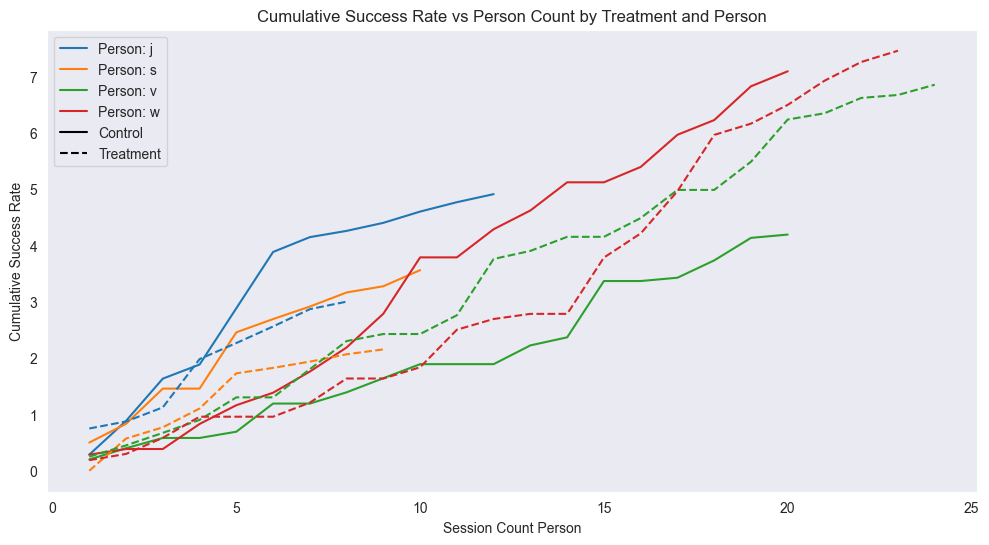

In [35]:
# Plotting cumulative success rate against person count, grouped by treatment and person
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10", n_colors=5)
person_to_id = {"j": 0, "s": 1, "v": 2, "w": 3, "js": 4}
handles = []

# Iterate over groups and plot
for (treatment, person), group in combined.groupby(['treatment', 'person']):
    if person == "js":
        continue
    plt.plot(group['person_count'], group['cumulative_person_success_rate'], label=f"Treatment: {treatment}, Person: {person}", color=palette[person_to_id[person]], linestyle='--' if treatment == 1 else '-')
    if treatment == 0:
        handles.append(plt.Line2D([0], [0], color=palette[person_to_id[person]], linestyle='-', label=f"Person: {person}"))

handles.append(plt.Line2D([0], [0], color='black', linestyle='-', label="Control"))
handles.append(plt.Line2D([0], [0], color='black', linestyle='--', label="Treatment"))
plt.title("Cumulative Success Rate vs Person Count by Treatment and Person")
plt.xlabel("Session Count Person")
plt.ylabel("Cumulative Success Rate")
plt.legend(handles=handles)
plt.grid()
# ploit to pdf
plt.savefig("person_count.pdf")

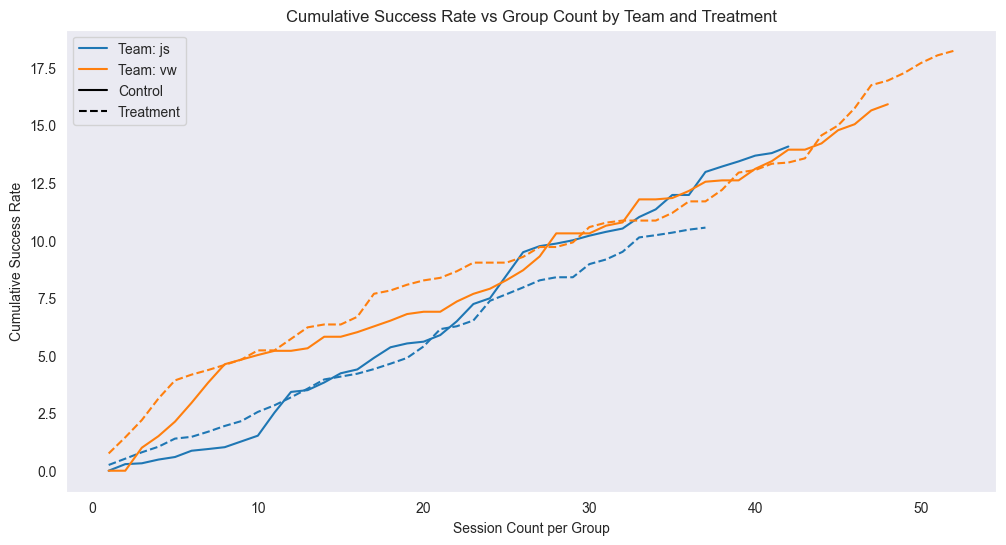

In [34]:
# Plotting cumulative group
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10", n_colors=5)
team_to_id = {"js": 0, "vw": 1}
handles = []

# Iterate over groups and plot
for (team, treatment), group in combined.groupby(['team', 'treatment']):
    plt.plot(group['group_count'], group['cumulative_group_success_rate'], label=f"Team: {team}, Treatment: {treatment}", color=palette[team_to_id[team]], linestyle='--' if treatment == 1 else '-')
    if treatment == 0:
        handles.append(plt.Line2D([0], [0], color=palette[team_to_id[team]], linestyle='-', label=f"Team: {team}"))

handles.append(plt.Line2D([0], [0], color='black', linestyle='-', label="Control"))
handles.append(plt.Line2D([0], [0], color='black', linestyle='--', label="Treatment"))
plt.title("Cumulative Success Rate vs Group Count by Team and Treatment")
plt.xlabel("Session Count per Group")
plt.ylabel("Cumulative Success Rate")
plt.legend(handles=handles)
plt.grid()
plt.savefig("group_count.pdf")

<Axes: xlabel='person_count', ylabel='success_rate'>

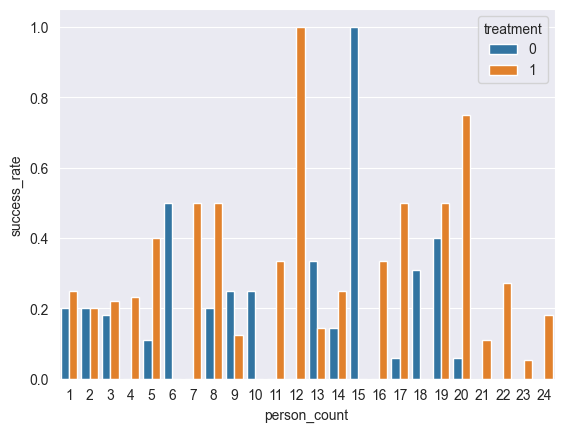

In [41]:
sns.barplot(data=combined[combined['person'] == 'v'], x="person_count", y='success_rate', hue="treatment")